# Wavelet analysis for rotation period extraction 

This notebook provide an example of analysis replacing the Lomb-Scargle periodogram by a wavelet analysis of the time series. The wavelet analysis is not a part of the PLATO MSAP4 rotation & activity baseline algorithms but it represents an interesting alternative in order to assess the performances of the framework. 

In [1]:
import star_privateer as sp

## A simple example

In [2]:
import importlib
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists ('stellar_analysis_features') :
    os.mkdir ('stellar_analysis_features')
if not os.path.exists ('stellar_analysis_plots') :
    os.mkdir ('stellar_analysis_plots')    

Our working case is KIC 3733735.

In [3]:
filename = sp.get_target_filename (sp.timeseries, '003733735')
t, s, dt = sp.load_resource (filename)

In order to save computing time, we rebin the data in 4-hour bins.

In [4]:
dt *= 4
t = np.mean (t.reshape (-1,4), axis=1)
s = np.mean (s.reshape (-1,4), axis=1)

In [5]:
t.shape, s.shape, dt

((17991,), (17991,), 0.08173461444675922)

We now run the analysis pipeline. In particular, we can take a look at the plots made from the different analysis methods. 

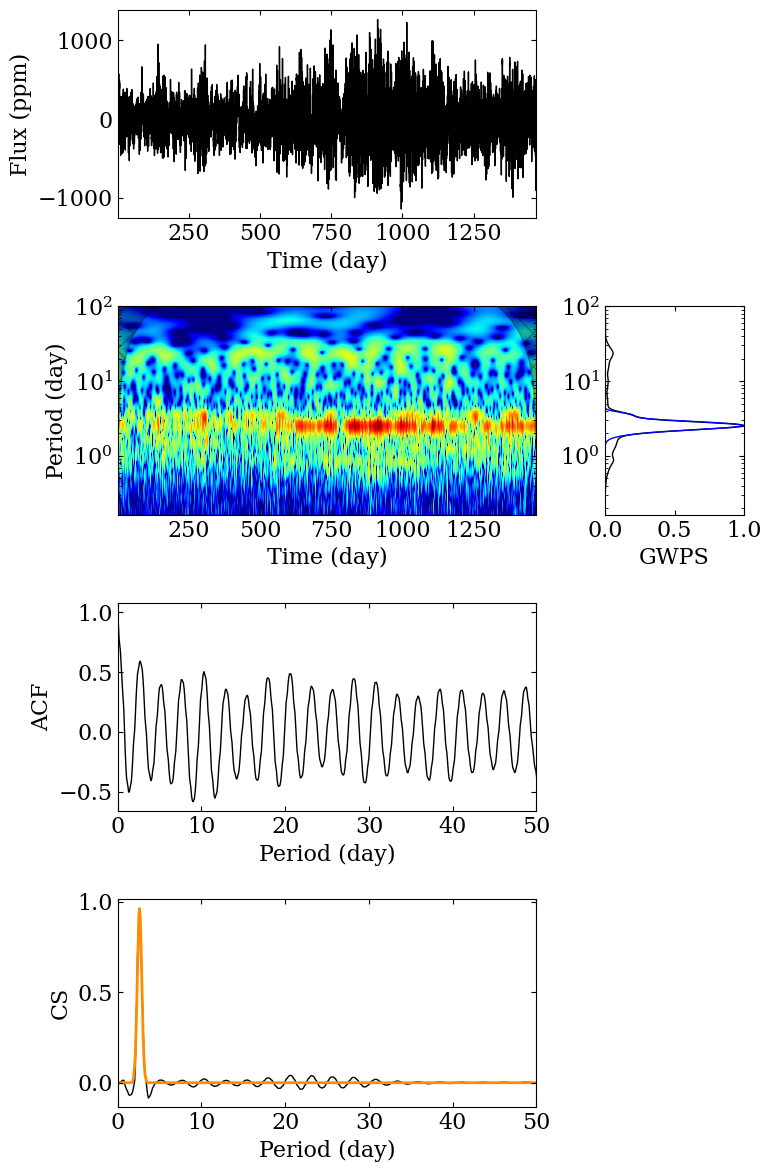

In [6]:
p_in = np.linspace (0, 50, 500)
(p_acf, gwps, wps, acf, 
 cs, coi, features, feature_names, _) = sp.analysis_pipeline (t, s, periods_in=p_in, figsize=(8,12),
                                                         wavelet_analysis=True, plot=True,
                                                         xlim=(0,50), normscale='log', ylogscale=True)

It is also possible to compute the wavelet power spectrum and plot it independently from the other methods.

In [7]:
dt = (t[1]-t[0])*86400
(periods, wps, gwps, 
 coi, scales) = sp.compute_wps(s, dt, normalise=True, mother=None)

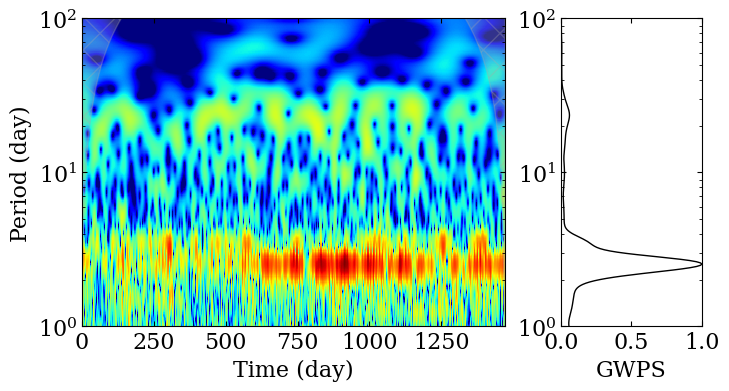

In [8]:
fig = sp.plot_wps(t-t[0], periods, wps, gwps, coi, 
                     scales, shading='auto', color_coi='darkgrey', 
                     ylogscale=True, lw=1, normscale='log', 
                     vmin=None, vmax=None, filename=None, dpi=300,
                     figsize=(8,4), ylim=(1, 100), show_contour=False) 